Imports

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from google.colab import files
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, normalize
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV,KFold
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from collections import defaultdict
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,make_scorer,fbeta_score

Using TensorFlow backend.


In [2]:
uploaded = files.upload()

Saving dopo_eda.csv to dopo_eda.csv


In [3]:
df = pd.read_csv("/content/dopo_eda.csv")
df.head()

,Unnamed: 0,text,label
0,0,econom recoveri nation climat pledg must desig...,0.0
1,1,difficult time it’ hard connect natur world ea...,0.0
2,2,decis postpon cop unavoid collect prioriti mus...,0.0
3,3,japan world’ fifth largest emitt greenhous gas...,0.0
4,4,countri includ naturebasedsolut climat plan nd...,0.0


In [4]:
df.drop("Unnamed: 0", axis = 1,inplace = True)
df.head()

,text,label
0,econom recoveri nation climat pledg must desig...,0.0
1,difficult time it’ hard connect natur world ea...,0.0
2,decis postpon cop unavoid collect prioriti mus...,0.0
3,japan world’ fifth largest emitt greenhous gas...,0.0
4,countri includ naturebasedsolut climat plan nd...,0.0


In [5]:
for i in range(len(df)):
    if df.label[i] != df.label[i]:
        print(df.loc[i])
        df.drop(i, inplace = True)

text     billion upon billion hard earn tax dollar spen...
label                                                  NaN
Name: 18007, dtype: object


# One-Hot Encoding (Count Vectorizing)

In [6]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = CountVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        param_grid = {}
        clf = MLPClassifier()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.3min finished


 For test size =  0.25  and number of folds  5

The score: 0.8936

Test set score : 0.896

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1793
         1.0       0.92      0.91      0.91      2709

    accuracy                           0.90      4502
   macro avg       0.89      0.89      0.89      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.7min finished


 For test size =  0.25  and number of folds  10

The score: 0.8934

Test set score : 0.901

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1906
         1.0       0.90      0.93      0.92      2596

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 26.2min finished


 For test size =  0.25  and number of folds  15

The score: 0.8949

Test set score : 0.899

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.88      1850
         1.0       0.92      0.91      0.91      2652

    accuracy                           0.90      4502
   macro avg       0.89      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 32.6min finished


 For test size =  0.25  and number of folds  20

The score: 0.8952

Test set score : 0.898

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1891
         1.0       0.92      0.91      0.91      2611

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.5min finished


 For test size =  0.3  and number of folds  5

The score: 0.8929

Test set score : 0.895

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2236
         1.0       0.91      0.91      0.91      3167

    accuracy                           0.89      5403
   macro avg       0.89      0.89      0.89      5403
weighted avg       0.89      0.89      0.89      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 14.7min finished


 For test size =  0.3  and number of folds  10

The score: 0.8944

Test set score : 0.898

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      2271
         1.0       0.91      0.92      0.91      3132

    accuracy                           0.90      5403
   macro avg       0.90      0.89      0.89      5403
weighted avg       0.90      0.90      0.90      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 20.6min finished


 For test size =  0.3  and number of folds  15

The score: 0.8984

Test set score : 0.894

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      2260
         1.0       0.90      0.92      0.91      3143

    accuracy                           0.89      5403
   macro avg       0.89      0.89      0.89      5403
weighted avg       0.89      0.89      0.89      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 28.0min finished


 For test size =  0.3  and number of folds  20

The score: 0.897

Test set score : 0.895

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      2198
         1.0       0.92      0.91      0.91      3205

    accuracy                           0.90      5403
   macro avg       0.89      0.89      0.89      5403
weighted avg       0.90      0.90      0.90      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.3min finished


 For test size =  0.35  and number of folds  5

The score: 0.9007

Test set score : 0.895

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2571
         1.0       0.91      0.91      0.91      3732

    accuracy                           0.90      6303
   macro avg       0.89      0.89      0.89      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.2min finished


 For test size =  0.35  and number of folds  10

The score: 0.8957

Test set score : 0.896

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2558
         1.0       0.91      0.91      0.91      3745

    accuracy                           0.90      6303
   macro avg       0.89      0.89      0.89      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 22.2min finished


 For test size =  0.35  and number of folds  15

The score: 0.89

Test set score : 0.892

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2611
         1.0       0.90      0.91      0.91      3692

    accuracy                           0.89      6303
   macro avg       0.89      0.89      0.89      6303
weighted avg       0.89      0.89      0.89      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 29.6min finished


 For test size =  0.35  and number of folds  20

The score: 0.8953

Test set score : 0.893

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2664
         1.0       0.91      0.91      0.91      3639

    accuracy                           0.89      6303
   macro avg       0.89      0.89      0.89      6303
weighted avg       0.89      0.89      0.89      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.9min finished


 For test size =  0.4  and number of folds  5

The score: 0.8959

Test set score : 0.896

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      3005
         1.0       0.91      0.91      0.91      4198

    accuracy                           0.90      7203
   macro avg       0.89      0.89      0.89      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.7min finished


 For test size =  0.4  and number of folds  10

The score: 0.8931

Test set score : 0.895

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2993
         1.0       0.91      0.91      0.91      4210

    accuracy                           0.89      7203
   macro avg       0.89      0.89      0.89      7203
weighted avg       0.89      0.89      0.89      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.8min finished


 For test size =  0.4  and number of folds  15

The score: 0.9014

Test set score : 0.890

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      2947
         1.0       0.91      0.90      0.91      4256

    accuracy                           0.89      7203
   macro avg       0.89      0.89      0.89      7203
weighted avg       0.89      0.89      0.89      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 28.0min finished


 For test size =  0.4  and number of folds  20

The score: 0.8886

Test set score : 0.901

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2956
         1.0       0.92      0.91      0.92      4247

    accuracy                           0.90      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.90      0.90      0.90      7203




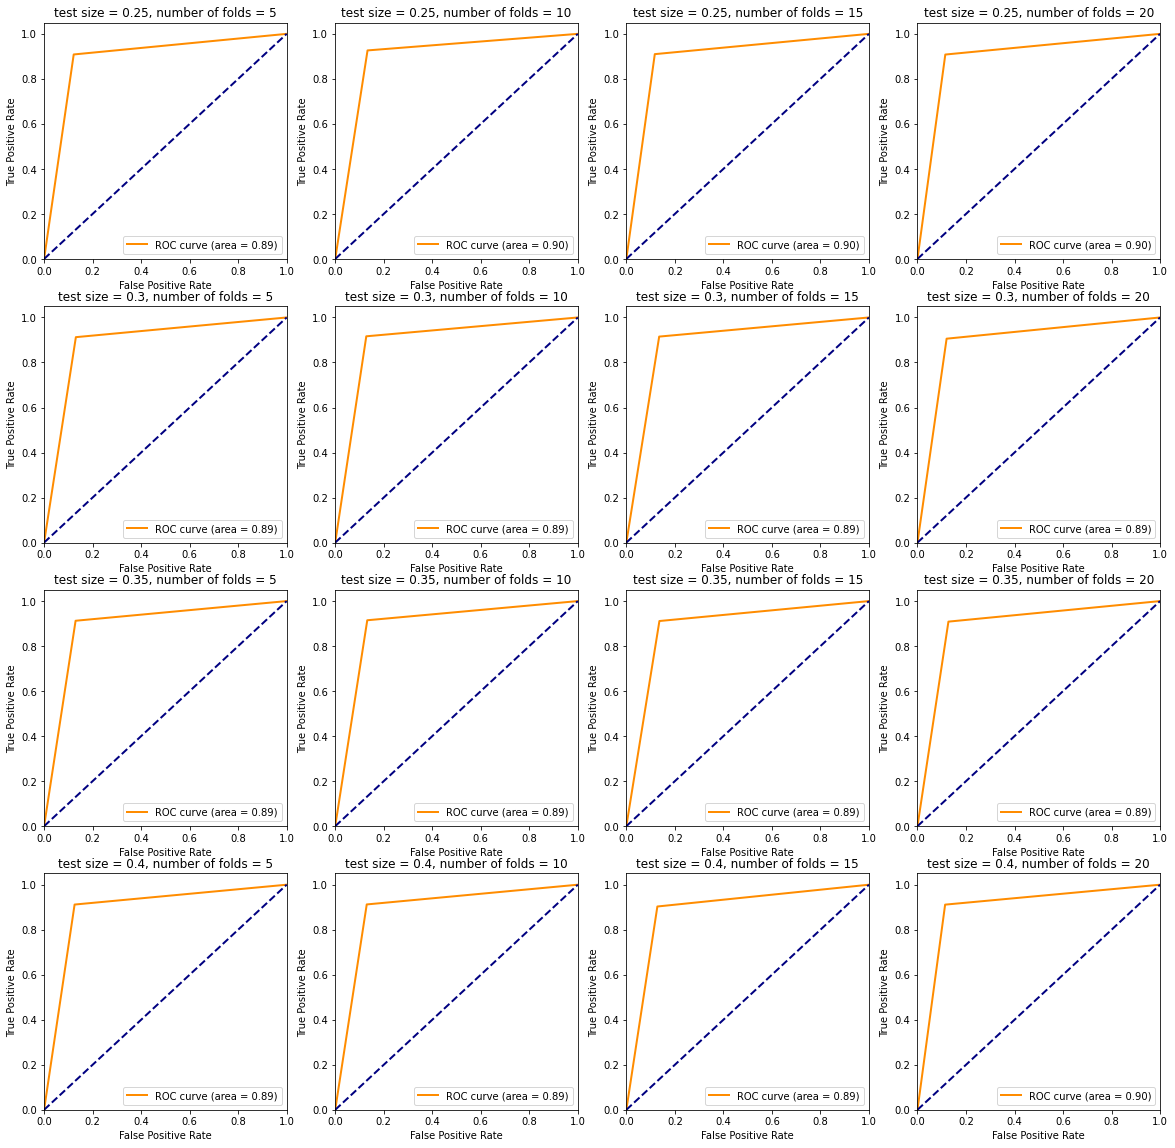

In [7]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()

# TF-IDF Transform

In [8]:
plot_ = defaultdict()
scaler = MaxAbsScaler()
vectorizer = CountVectorizer()
test_size_range = [0.25, 0.30, 0.35, 0.40]
cv_range = [5, 10, 15, 20]
for i in range(4):
    for j in range(4):
        X_train, X_test, y_train, y_test = train_test_split(list(df.text),list(df.label),test_size=test_size_range[i], shuffle = True)
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)
        X_test = vectorizer.transform(X_test)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        kfcv = KFold(n_splits=cv_range[j],shuffle=True,random_state=101) #<--- 5-fold cross-validation
        
        param_grid = {}
        clf = MLPClassifier()
        grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                           cv=kfcv,n_jobs = -1, verbose =2, scoring='accuracy')
        grid_search.fit(X_train,y_train)
        best_grid = grid_search.best_estimator_
        best_params = best_grid.get_params()
        print( " For test size = ", test_size_range[i], " and number of folds ", cv_range[j])
        print()
        print('The score: {}'.format(round(grid_search.best_score_,4)))
        print()
        print("Test set score : {:.3f}".format(accuracy_score(best_grid.predict(X_test), y_test)))
        print()
        print('CLASSFICATION_REPORT')
        print()
        print(classification_report(y_test,best_grid.predict(X_test)))
        print()
        plot_[(i,j)] = roc_curve(y_test, best_grid.predict(X_test))   

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.0min finished


 For test size =  0.25  and number of folds  5

The score: 0.9006

Test set score : 0.896

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1813
         1.0       0.92      0.91      0.91      2689

    accuracy                           0.90      4502
   macro avg       0.89      0.89      0.89      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 15.3min finished


 For test size =  0.25  and number of folds  10

The score: 0.9007

Test set score : 0.901

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1854
         1.0       0.92      0.92      0.92      2648

    accuracy                           0.90      4502
   macro avg       0.90      0.90      0.90      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 23.9min finished


 For test size =  0.25  and number of folds  15

The score: 0.8992

Test set score : 0.898

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      1859
         1.0       0.91      0.91      0.91      2643

    accuracy                           0.90      4502
   macro avg       0.89      0.89      0.89      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 30.0min finished


 For test size =  0.25  and number of folds  20

The score: 0.902

Test set score : 0.896

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87      1827
         1.0       0.92      0.91      0.91      2675

    accuracy                           0.90      4502
   macro avg       0.89      0.89      0.89      4502
weighted avg       0.90      0.90      0.90      4502


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.7min finished


 For test size =  0.3  and number of folds  5

The score: 0.8994

Test set score : 0.901

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2238
         1.0       0.91      0.92      0.92      3165

    accuracy                           0.90      5403
   macro avg       0.90      0.90      0.90      5403
weighted avg       0.90      0.90      0.90      5403


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 13.4min finished


 For test size =  0.3  and number of folds  10

The score: 0.8989

Test set score : 0.895

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2272
         1.0       0.90      0.91      0.91      3131

    accuracy                           0.89      5403
   macro avg       0.89      0.89      0.89      5403
weighted avg       0.89      0.89      0.89      5403


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 20.0min finished


 For test size =  0.3  and number of folds  15

The score: 0.8977

Test set score : 0.899

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      2231
         1.0       0.92      0.91      0.91      3172

    accuracy                           0.90      5403
   macro avg       0.90      0.90      0.90      5403
weighted avg       0.90      0.90      0.90      5403


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 27.2min finished


 For test size =  0.3  and number of folds  20

The score: 0.9017

Test set score : 0.893

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2246
         1.0       0.91      0.91      0.91      3157

    accuracy                           0.89      5403
   macro avg       0.89      0.89      0.89      5403
weighted avg       0.89      0.89      0.89      5403


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished


 For test size =  0.35  and number of folds  5

The score: 0.9005

Test set score : 0.896

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      2628
         1.0       0.91      0.91      0.91      3675

    accuracy                           0.90      6303
   macro avg       0.89      0.89      0.89      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 11.3min finished


 For test size =  0.35  and number of folds  10

The score: 0.8941

Test set score : 0.900

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2572
         1.0       0.92      0.92      0.92      3731

    accuracy                           0.90      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.3min finished


 For test size =  0.35  and number of folds  15

The score: 0.899

Test set score : 0.897

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      2611
         1.0       0.91      0.92      0.91      3692

    accuracy                           0.90      6303
   macro avg       0.89      0.89      0.89      6303
weighted avg       0.90      0.90      0.90      6303


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.9min finished


 For test size =  0.35  and number of folds  20

The score: 0.9003

Test set score : 0.906

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      2628
         1.0       0.92      0.92      0.92      3675

    accuracy                           0.91      6303
   macro avg       0.90      0.90      0.90      6303
weighted avg       0.91      0.91      0.91      6303


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.6min finished


 For test size =  0.4  and number of folds  5

The score: 0.8951

Test set score : 0.902

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2961
         1.0       0.92      0.92      0.92      4242

    accuracy                           0.90      7203
   macro avg       0.90      0.90      0.90      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 10.9min finished


 For test size =  0.4  and number of folds  10

The score: 0.9045

Test set score : 0.898

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      2962
         1.0       0.91      0.91      0.91      4241

    accuracy                           0.90      7203
   macro avg       0.89      0.89      0.89      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 15 folds for each of 1 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.2min finished


 For test size =  0.4  and number of folds  15

The score: 0.8979

Test set score : 0.898

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      3014
         1.0       0.91      0.91      0.91      4189

    accuracy                           0.90      7203
   macro avg       0.89      0.90      0.89      7203
weighted avg       0.90      0.90      0.90      7203


Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 22.2min finished


 For test size =  0.4  and number of folds  20

The score: 0.9007

Test set score : 0.894

CLASSFICATION_REPORT

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      2976
         1.0       0.91      0.91      0.91      4227

    accuracy                           0.89      7203
   macro avg       0.89      0.89      0.89      7203
weighted avg       0.89      0.89      0.89      7203




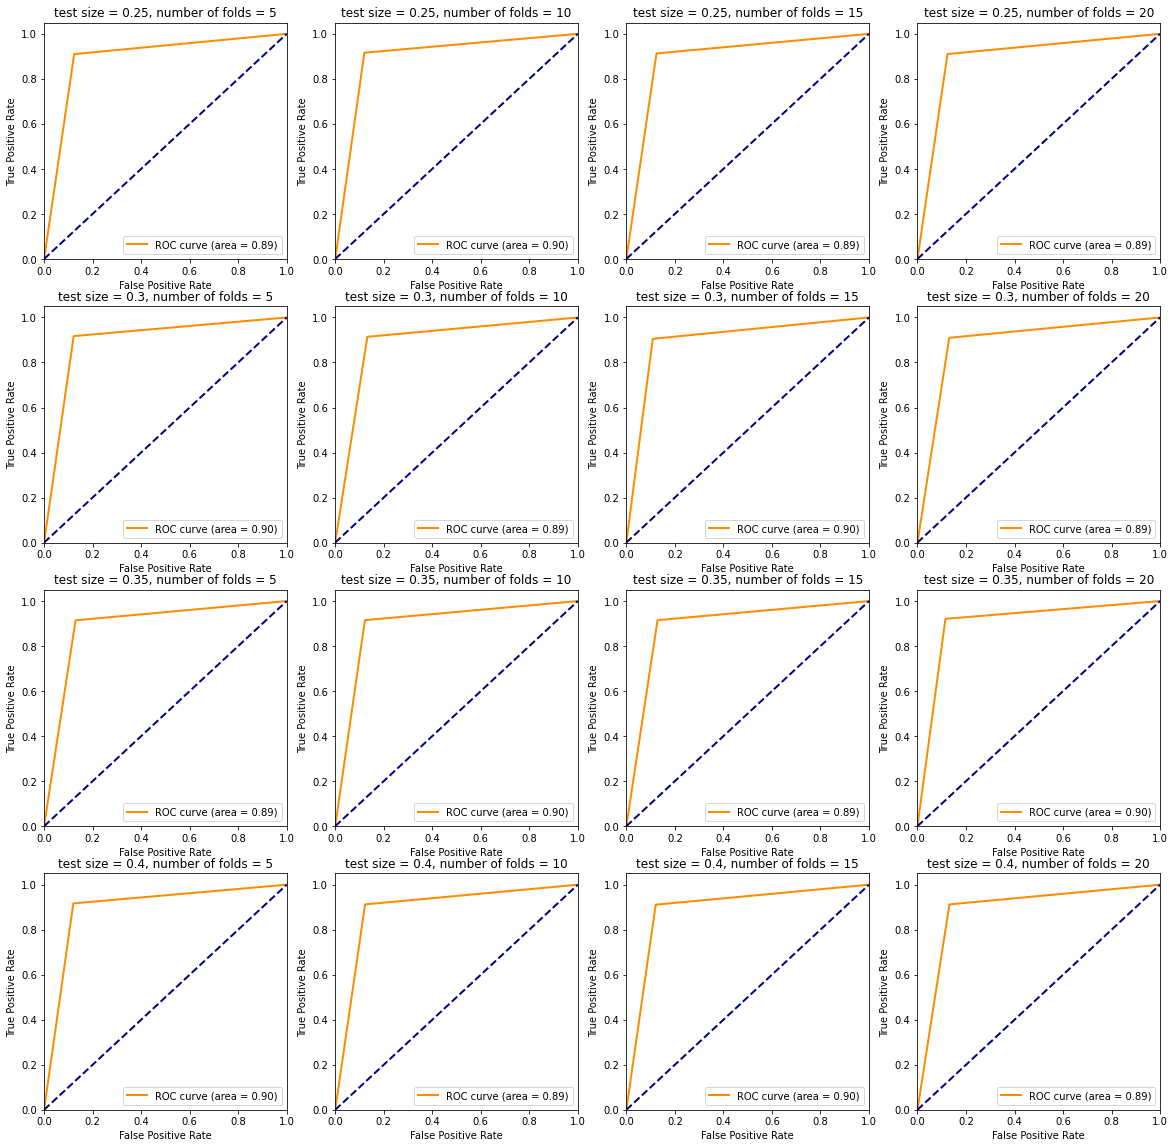

In [10]:
f, axes = plt.subplots(4,4,figsize=(20,20))
for i in range(4):
    for j in range(4):
        fpr, tpr, _ = plot_[(i,j)]
        roc_auc = auc(fpr, tpr)
        lw = 2
        axes[i][j].plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        axes[i][j].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        axes[i][j].set_xlim([0.0, 1.0])
        axes[i][j].set_ylim([0.0, 1.05])
        axes[i][j].set_xlabel('False Positive Rate')
        axes[i][j].set_ylabel('True Positive Rate')
        axes[i][j].set_title("test size = {}, number of folds = {}".format(test_size_range[i],cv_range[j]))
        axes[i][j].legend(loc="lower right")
plt.show()